In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
os.chdir(r'C:\Users\Bushra Ansari\Desktop\LMS DATASET\KNN\Market Positioning of Mobile')

In [3]:
os.listdir()

['Mobile_data.csv', 'Problem Statement_KNN.pdf']

In [4]:
mob = pd.read_csv('Mobile_data.csv')
mob.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
mob.dtypes.value_counts()

int64      13
float64     2
dtype: int64

In [7]:
mob.shape

(2000, 15)

In [8]:
mob.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

No missing values in data set.

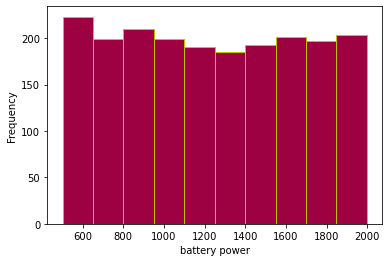

In [9]:
mob['battery_power'].plot(kind = 'hist', cmap = 'Spectral', edgecolor = 'y')
plt.xlabel('battery power')
plt.show()

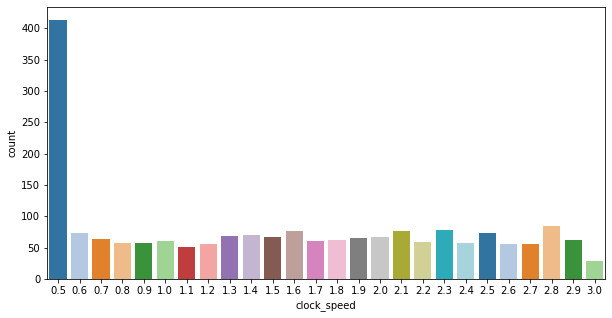

In [10]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['clock_speed'], data = mob, palette = 'tab20')
plt.show()

In [11]:
mob['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

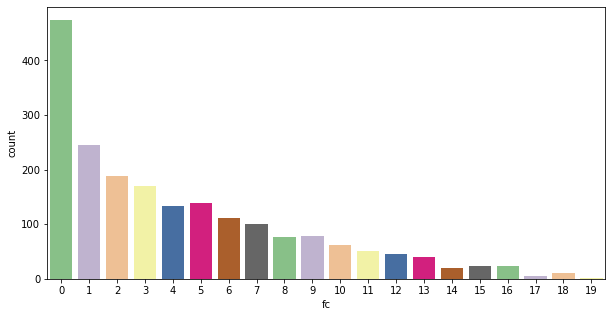

In [12]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['fc'], data = mob, palette = 'Accent')
plt.show()

In [13]:
mob['int_memory'].nunique()

63

In [14]:
mob['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

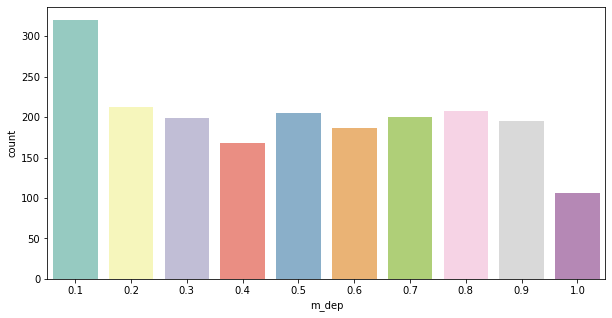

In [15]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['m_dep'], data = mob, palette = 'Set3')
plt.show()

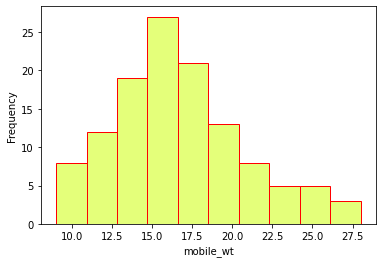

In [16]:
mob['mobile_wt'].value_counts().plot(kind = 'hist', cmap = 'Wistia', edgecolor = 'r')
plt.xlabel('mobile_wt')
plt.show()

In [17]:
mob['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

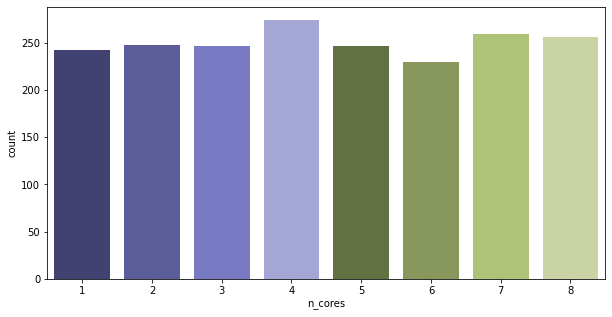

In [18]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['n_cores'], data = mob, palette = 'tab20b')
plt.show()

In [19]:
mob['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12], dtype=int64)

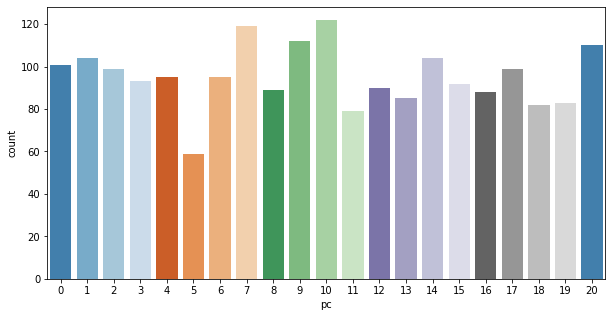

In [20]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['pc'], data = mob, palette = 'tab20c')
plt.show()

In [21]:
mob['sc_h'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15],
      dtype=int64)

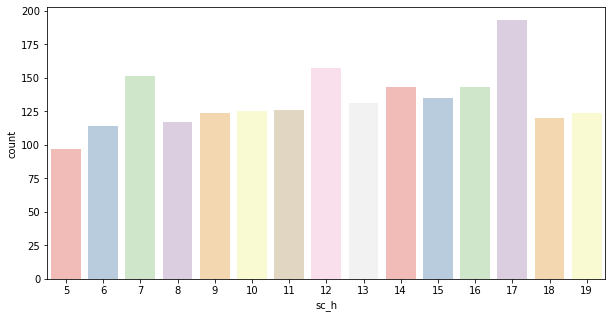

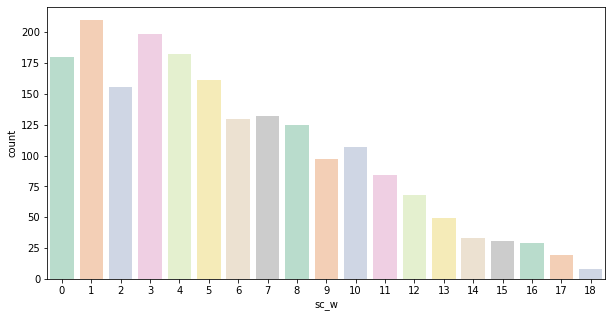

In [22]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['sc_h'], data = mob, palette = 'Pastel1')
plt.show()

plt.figure(figsize = [10,5])
sns.countplot(x = mob['sc_w'], data = mob, palette = 'Pastel2')
plt.show()

In [23]:
mob['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8], dtype=int64)

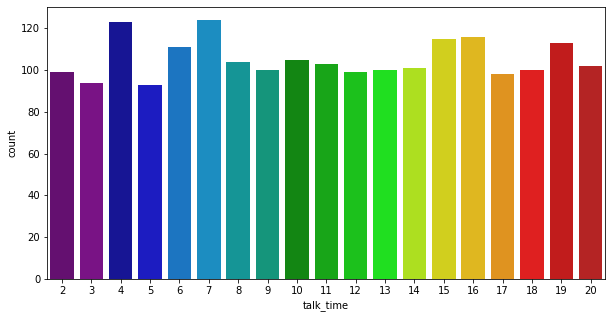

In [24]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['talk_time'], data = mob, palette = 'nipy_spectral')
plt.show()

In [25]:
mob['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

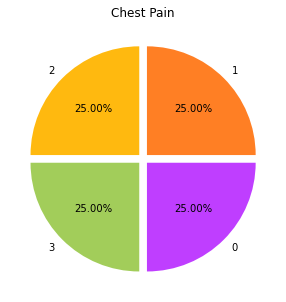

In [26]:
plt.figure(figsize = [5,5])
plt.pie(mob['price_range'].value_counts(), autopct = '%0.2f%%', labels = mob['price_range'].value_counts().index,
        explode = [0.05,0.05,0.05,0.05], colors = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF'])
plt.title('Chest Pain')
plt.show()

In [27]:
mob.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

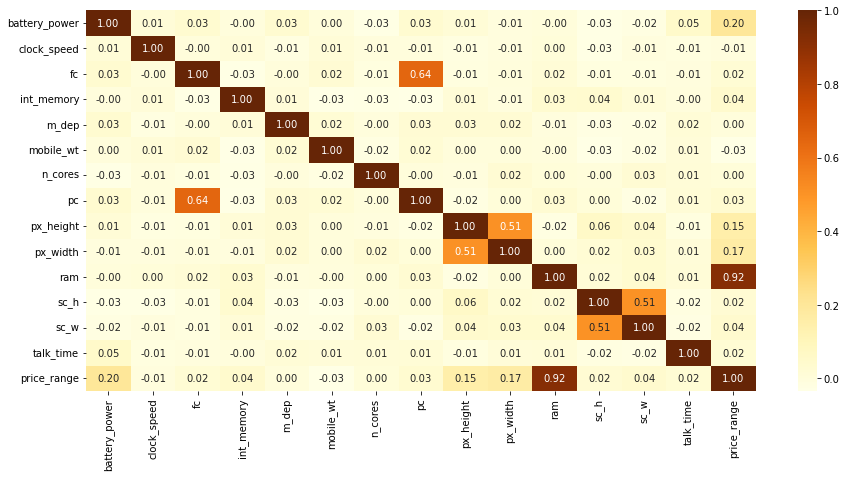

In [28]:
# Checking correlation among numeral variables
corr = mob.corr()
plt.figure(figsize = [15,7])
sns.heatmap(corr, annot = True, cmap = 'YlOrBr', fmt = '0.2f')
plt.show()

In [29]:
# Checking Outliers
mob.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.80,2.90,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,0.00,5.00,10.0,15.00,20.00,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,30.98,45.97,58.00,70.95,282.75,564.0,947.25,1485.05,1568.04,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,526.96,542.00,562.00,579.85,874.75,1247.0,1633.00,1929.05,1947.00,1963.00,1974.00,1987.00,1998.0


In [30]:
# Outliers Treatment
mob['fc'] = np.where(mob['fc'] > 16.0, 16.0, mob['fc'])

In [31]:
mob['px_height'] = np.where(mob['px_height'] > 1791.01, 1791.01, mob['px_height'])
mob['px_height'] = np.where(mob['px_height'] < 15.00, 15.00, mob['px_height'])

In [32]:
mob['sc_w'] = np.where(mob['sc_w'] == 0, np.nan, mob['sc_w'])

In [33]:
mob['sc_w'].mean(), mob['sc_w'].median()

(6.337362637362637, 6.0)

In [34]:
# replacing 180 nan values with median
mob['sc_w'].fillna(mob['sc_w'].median(), inplace = True)

In [35]:
y = mob['price_range']
x = mob.drop(columns = ['price_range'])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)

### K Nearest Neighbors Classifier

In [37]:
# Using GridSearch to find best parameters
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : [10,11,12,13,14,15],
          'p' : [1,2,3]}

knn_cv = KNeighborsClassifier()
Gsearch_knn = GridSearchCV(estimator = knn_cv, param_grid = params, cv = 10, n_jobs = -1, verbose = 1 )

Gsearch_knn.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15],
                         'p': [1, 2, 3]},
             verbose=1)

In [38]:
Gsearch_knn.best_params_

{'n_neighbors': 13, 'p': 2}

In [39]:
knn = KNeighborsClassifier(n_neighbors=13, p= 2)
knn.fit(x_train, y_train)
print('Train Score : ', knn.score(x_train, y_train))
print('Test Score : ', knn.score(x_test, y_test))

Train Score :  0.9492857142857143
Test Score :  0.9416666666666667


In [40]:
def myKNN(kn, verbose=True):
    k=[]
    train_acc=[]
    test_acc=[]
    for i in range(1,kn,2):
        knni=KNeighborsClassifier(n_neighbors=i)
        knni.fit(x_train, y_train)
        k.append(i)
        ktt=knni.score(x_train, y_train)
        ktst=knni.score(x_test, y_test)
        diff=ktt-ktst
        train_acc.append( ktt)
        test_acc.append( ktst)
        if verbose:
            print(f"for k= {i} : train score { round(ktt,3)} and test score {round( ktst,3)}")

    plt.plot(k, train_acc, label="Train Accuracy", color="red")
    plt.plot(k, test_acc, label="Test Accuracy", color="blue")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Scores")
    plt.show()
          
    return k, train_acc, test_acc


for k= 1 : train score 1.0 and test score 0.895
for k= 3 : train score 0.959 and test score 0.907
for k= 5 : train score 0.952 and test score 0.918
for k= 7 : train score 0.95 and test score 0.93
for k= 9 : train score 0.954 and test score 0.928
for k= 11 : train score 0.947 and test score 0.932
for k= 13 : train score 0.949 and test score 0.942
for k= 15 : train score 0.943 and test score 0.933
for k= 17 : train score 0.944 and test score 0.932
for k= 19 : train score 0.945 and test score 0.927
for k= 21 : train score 0.944 and test score 0.925
for k= 23 : train score 0.939 and test score 0.927
for k= 25 : train score 0.941 and test score 0.93
for k= 27 : train score 0.939 and test score 0.925
for k= 29 : train score 0.934 and test score 0.922


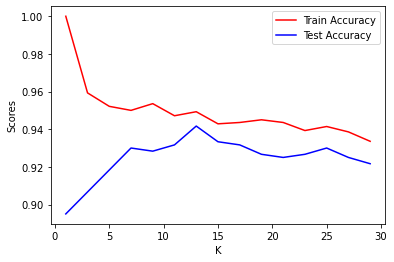

In [41]:
k, train_acc, test_acc=myKNN(30, verbose=True)

In [42]:
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)

In [43]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       348
           1       0.93      0.95      0.94       346
           2       0.91      0.93      0.92       352
           3       0.98      0.94      0.96       354

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



In [44]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       152
           1       0.95      0.91      0.93       154
           2       0.89      0.93      0.91       148
           3       0.96      0.94      0.95       146

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

